In [2]:
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt

# load coordinate data

In [9]:
# load corrdinates of the image from the text file
path_cor = '../../data/jpg/labels_global_F814W_InvertY/'
files_name_cor = glob.glob(os.path.join(path_cor, "*.txt"))

In [11]:
files_name_cor

['../../data/jpg/labels_global_F814W_InvertY/hst_10190_28_acs_wfc_f814w_j90o28_drc.txt',
 '../../data/jpg/labels_global_F814W_InvertY/hst_10190_12_acs_wfc_f814w_j90o12_drc.txt',
 '../../data/jpg/labels_global_F814W_InvertY/hst_14610_12_acs_wfc_f814w_jdb612_drc.txt',
 '../../data/jpg/labels_global_F814W_InvertY/hst_14610_02_acs_wfc_f814w_jdb602_drc.txt',
 '../../data/jpg/labels_global_F814W_InvertY/hst_16274_54_acs_wfc_f814w_je9t54_drc.txt',
 '../../data/jpg/labels_global_F814W_InvertY/hst_14610_23_acs_wfc_f814w_jdb623_drc.txt',
 '../../data/jpg/labels_global_F814W_InvertY/hst_14610_30_acs_wfc_f814w_jdb630_drc.txt',
 '../../data/jpg/labels_global_F814W_InvertY/hst_14610_27_acs_wfc_f814w_jdb627_drc.txt',
 '../../data/jpg/labels_global_F814W_InvertY/hst_14610_18_acs_wfc_f814w_jdb618_drc.txt',
 '../../data/jpg/labels_global_F814W_InvertY/hst_14610_50_acs_wfc_f814w_jdb650_drc.txt']

In [12]:
# read data in txt file
with open(files_name_cor[0], 'r') as f:
    data = f.read()
    print(data)



Cluster 4345.1594 3210.6727 100 100
Cluster 4053.3451 3980.5933 100 100
Unknown 3749.5921 432.52298 100 100
Cluster 3563.3774 2254.4871 100 100
Unknown 3212.5738 560.43218 100 100
Unknown 2949.1477 1564.4029 100 100
Unknown 2448.3617 2044.3744 100 100
Unknown 1268.68 1374.4495 100 100



# load image data

In [15]:
# read jpg file
path = '../../data/jpg/global_F814W_InvertY/'
files_name = glob.glob(os.path.join(path, "*.jpg"))

In [16]:
files_name

['../../data/jpg/global_F814W_InvertY/hst_14610_50_acs_wfc_f814w_jdb650_drc.jpg',
 '../../data/jpg/global_F814W_InvertY/hst_14610_30_acs_wfc_f814w_jdb630_drc.jpg',
 '../../data/jpg/global_F814W_InvertY/hst_10190_28_acs_wfc_f814w_j90o28_drc.jpg',
 '../../data/jpg/global_F814W_InvertY/hst_10190_12_acs_wfc_f814w_j90o12_drc.jpg',
 '../../data/jpg/global_F814W_InvertY/hst_16274_54_acs_wfc_f814w_je9t54_drc.jpg',
 '../../data/jpg/global_F814W_InvertY/hst_14610_02_acs_wfc_f814w_jdb602_drc.jpg',
 '../../data/jpg/global_F814W_InvertY/hst_14610_18_acs_wfc_f814w_jdb618_drc.jpg',
 '../../data/jpg/global_F814W_InvertY/hst_14610_23_acs_wfc_f814w_jdb623_drc.jpg',
 '../../data/jpg/global_F814W_InvertY/hst_14610_27_acs_wfc_f814w_jdb627_drc.jpg',
 '../../data/jpg/global_F814W_InvertY/hst_14610_12_acs_wfc_f814w_jdb612_drc.jpg']

## display box on image

[['Cluster', '4345.1594', '3210.6727', '100', '100'], ['Cluster', '4053.3451', '3980.5933', '100', '100'], ['Unknown', '3749.5921', '432.52298', '100', '100'], ['Cluster', '3563.3774', '2254.4871', '100', '100'], ['Unknown', '3212.5738', '560.43218', '100', '100'], ['Unknown', '2949.1477', '1564.4029', '100', '100'], ['Unknown', '2448.3617', '2044.3744', '100', '100'], ['Unknown', '1268.68', '1374.4495', '100', '100']]


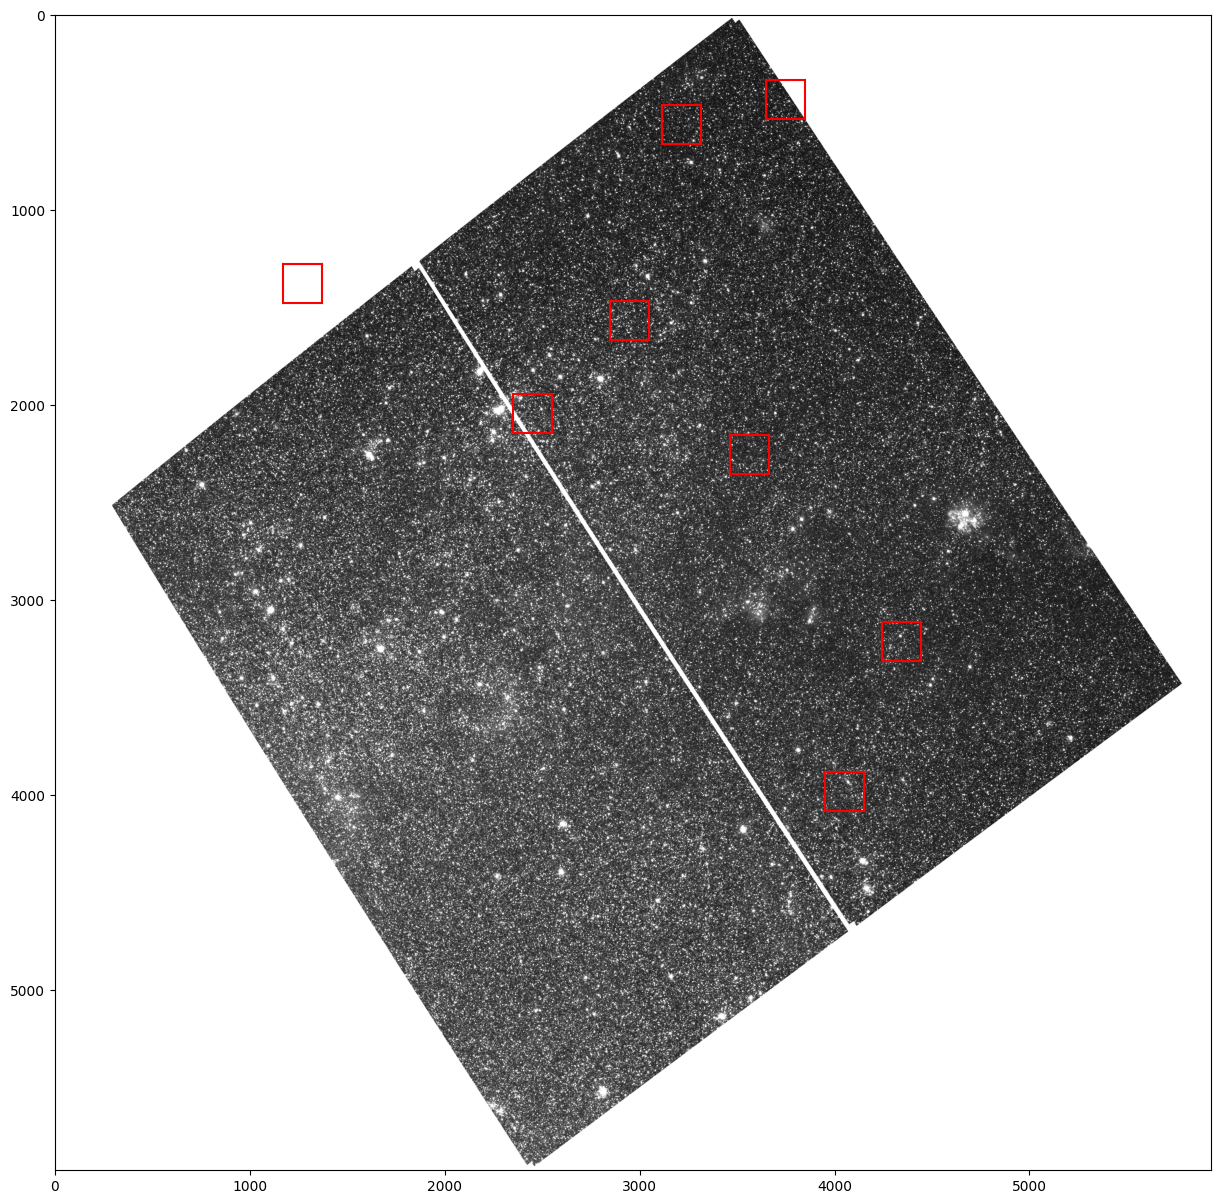

In [17]:
def plot_bounding_box(items_list, img):
    # read data in items_list then save in a list
    with open(items_list, "r") as f:
        items_list = f.readlines()
        items_list = [item.strip().split(" ") for item in items_list]
    print(items_list)
    plt.rcParams['figure.figsize'] = [15, 15]
    for item in items_list:
        x = float(item[1])
        y = float(item[2])
        w = float(item[3])
        h = float(item[4])
        x_min = x - w
        x_max = x + w
        y_min = y - h
        y_max = y + h
        plt.plot([x_min, x_max], [y_min, y_min], c='r')
        plt.plot([x_min, x_max], [y_max, y_max], c='r')
        plt.plot([x_min, x_min], [y_min, y_max], c='r')
        plt.plot([x_max, x_max], [y_min, y_max], c='r')
    plt.imshow(img, cmap='gray')
    plt.show()

img_ = cv2.imread(files_name[0], 0) # flag = 0: read image as grayscale
plot_bounding_box(files_name_cor[0], img_)

## cropping process

In [122]:
def coordinate_index(items_list):
    with open(items_list, "r") as f:
        items_list = f.readlines()
        items_list = [item.strip().split(" ") for item in items_list]
    # print(items_list)
    # calculate x_min, x_max, y_min, y_max then return
    coor_list = []
    for item in items_list:
        label = item[0]
        x = float(item[1])
        y = float(item[2])
        w = float(item[3])
        h = float(item[4])
        x_min = x - w
        x_max = x + w
        y_min = y - h
        y_max = y + h
        coor_list.append([x_min, x_max, y_min, y_max, x, y, label])
    return coor_list

In [123]:
# create function to return small image after crop with size that intialized
def crop_image(img, new_h, new_w, coor_list): # use function per image
    # load coordinate of the image
    coor_list = coordinate_index(coor_list)
    new_coor = []

    img_h = img.shape[0]
    img_w = img.shape[1]
    cropped_list = []
    for j in range(0, img_h, new_h): # for y axis
        # calculate the end of the crop whole 4 corner
        start_y = j
        end_y = j + new_h
        if end_y > img_h: # if the end of the crop is out of the image
            end_y = img_h
            start_y = img_h - new_h
        for i in range(0, img_w, new_w): # for x axis
            start_x = i
            end_x = i + new_w
            if end_x > img_w: # if the end of the crop is out of the image
                end_x = img_w
                start_x = img_w - new_w

            # calculate the coordinate of the object in the crop
            temp_coor = [] # keep per small image
            for coor in coor_list: # check if coordinate of the crop is in the coordinate of the object
                if coor[0] >= start_x and coor[1] <= end_x and coor[2] >= start_y and coor[3] <= end_y:
                    # change coordinate of the object to the new coordinate follow new crop
                    new_x_min = coor[0] - start_x
                    new_x_max = coor[1] - start_x
                    new_y_min = coor[2] - start_y
                    new_y_max = coor[3] - start_y
                    new_x = coor[4] - start_x
                    new_y = coor[5] - start_y
                    label = coor[6]
                    temp_coor.append([new_x_min, new_x_max, new_y_min, new_y_max, new_x, new_y, label])

            new_coor.append(temp_coor)
            cropped_list.append(img[start_y:end_y, start_x:end_x])
    return cropped_list, new_coor

In [124]:
img = cv2.imread(files_name[0], 0) # 0 for grayscale
img.shape # -> [height, width]

(5802, 5810)

In [125]:
new_h = 1024
new_w = 1024
# new_h = 2048
# new_w = 2048
# new_h = 4096
# new_w = 4096
cropped_list, new_coordinate = crop_image(img, new_h, new_w, files_name_cor[0])

In [126]:
print(len(cropped_list), len(new_coordinate))
print(new_coordinate)
for i in new_coordinate:
    print(len(i), end=' ')

36 36
[[], [], [], [], [], [], [], [[566.1642999999999, 766.1642999999999, 608.1669999999999, 808.1669999999999, 666.1642999999999, 708.1669999999999, 'Cluster']], [[688.9031, 888.9031, 18.06140000000005, 218.06140000000005, 788.9031, 118.06140000000005, 'Cluster'], [505.52430000000004, 705.5243, 382.0657000000001, 582.0657000000001, 605.5243, 482.0657000000001, 'Unknown'], [399.62789999999995, 599.6279, 382.0703000000001, 582.0703000000001, 499.62789999999995, 482.0703000000001, 'Unknown'], [120.6525999999999, 320.6525999999999, 64.0902000000001, 264.0902000000001, 220.6525999999999, 164.0902000000001, 'Cluster']], [], [], [], [[761.35442, 961.35442, 454.3607000000002, 654.3607000000002, 861.35442, 554.3607000000002, 'Cluster']], [], [], [], [], [], [], [[83.5897, 283.5897, 206.26800000000003, 406.26800000000003, 183.5897, 306.26800000000003, 'Cluster']], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
0 0 0 0 0 0 0 1 4 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [127]:
print(len(cropped_list), cropped_list[0].shape)

36 (1024, 1024)


In [128]:
# plt.imshow(cropped_list[10], cmap="gray")

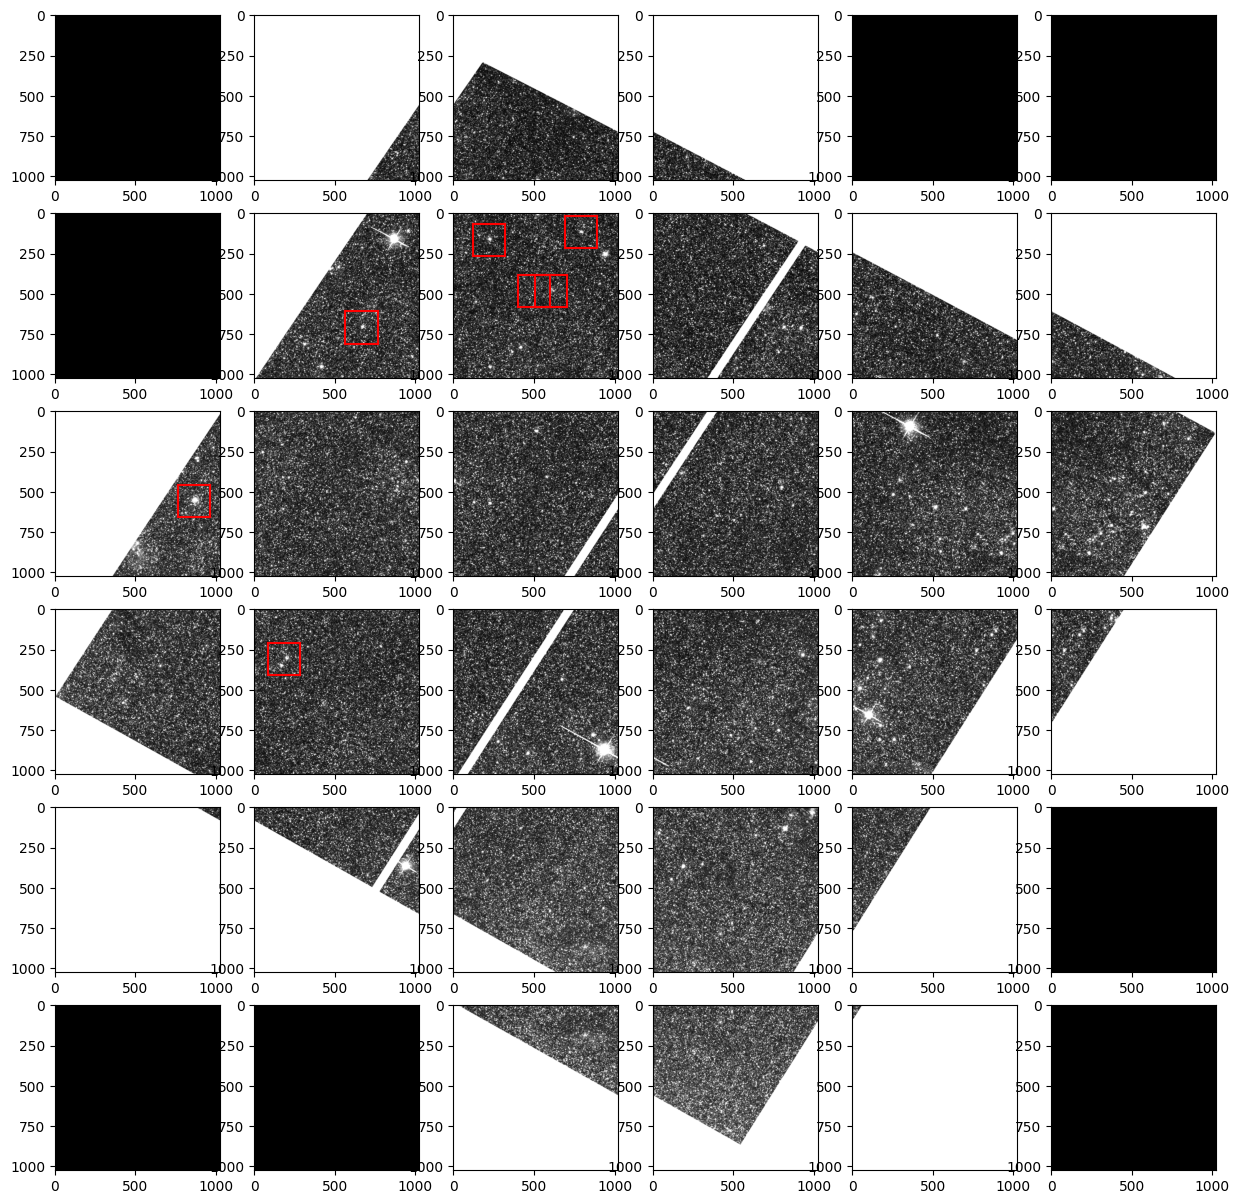

In [129]:
# plot all cropped image in cropped_list by row and column come from square root of length of cropped_list then plot scatter of coordinate of the object
plt.rcParams['figure.figsize'] = [15, 15]
# plot all cropped image in list by row and column come from square root of length of list
row = int(np.sqrt(len(cropped_list)))
column = int(np.sqrt(len(cropped_list)))
fig, ax = plt.subplots(row, column)
for i in range(row):
    for j in range(column):
        ax[i, j].imshow(cropped_list[i*column + j], cmap='gray')
        for coor in new_coordinate[i*column + j]:
            x_min = coor[0]
            x_max = coor[1]
            y_min = coor[2]
            y_max = coor[3]
            ax[i, j].plot([x_min, x_max], [y_min, y_min], c='r')
            ax[i, j].plot([x_min, x_max], [y_max, y_max], c='r')
            ax[i, j].plot([x_min, x_min], [y_min, y_max], c='r')
            ax[i, j].plot([x_max, x_max], [y_min, y_max], c='r')
plt.show()